# Importing Dependancies

In [1]:
%matplotlib notebook 
%matplotlib inline

import os
import csv
import random
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import zipfile
from scipy.stats import linregress
import glob

# Reading Files & Creating DataFrames

In [2]:
#Air Quality Index DataFrame
aqi_df = pd.read_csv("../Output/aqi_compiled.csv")

In [57]:
#Gases DataFrame
co_df = pd.read_csv("../Output/co_compiled.csv")
no2_df = pd.read_csv("../Output/no2_compiled.csv")
ozone_df = pd.read_csv("../Output/ozone_compiled.csv")
so2_df = pd.read_csv("../Output/so2_compiled.csv")

In [3]:
no2_df = pd.read_csv("../Output/no2_compiled.csv")
no2_df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,4,7,10,42602,2,33.6547,-111.1074,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,2,75,LOW LEVEL NOX INSTRUMENTAL - TECO 42S CHEMILUM...,TONTO NM,SOUTH OF SR88,Arizona,Gila,Tonto National Monument,"Payson, AZ",2013-06-11
1,4,7,10,42602,2,33.6547,-111.1074,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,1,75,LOW LEVEL NOX INSTRUMENTAL - TECO 42S CHEMILUM...,TONTO NM,SOUTH OF SR88,Arizona,Gila,Tonto National Monument,"Payson, AZ",2013-06-11
2,4,7,10,42602,2,33.6547,-111.1074,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,6,75,LOW LEVEL NOX INSTRUMENTAL - TECO 42S CHEMILUM...,TONTO NM,SOUTH OF SR88,Arizona,Gila,Tonto National Monument,"Payson, AZ",2013-06-11
3,4,7,10,42602,2,33.6547,-111.1074,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,4,75,LOW LEVEL NOX INSTRUMENTAL - TECO 42S CHEMILUM...,TONTO NM,SOUTH OF SR88,Arizona,Gila,Tonto National Monument,"Payson, AZ",2013-06-11
4,4,7,10,42602,2,33.6547,-111.1074,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,3,75,LOW LEVEL NOX INSTRUMENTAL - TECO 42S CHEMILUM...,TONTO NM,SOUTH OF SR88,Arizona,Gila,Tonto National Monument,"Payson, AZ",2013-06-11


In [13]:
no2_nj = no2_df.loc[no2_df["State Name"] == "New Jersey"]
no2_nj.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
81209,34,3,5,42602,1,40.89858,-74.0299,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,30,74,INSTRUMENTAL - CHEMILUMINESCENCE,TEANECK,"FAIRLEIGH DICKINSON UNIV., 1000 RIVER RD",New Jersey,Bergen,Teaneck (Township of),"New York-Newark-Jersey City, NY-NJ-PA",2017-04-21
81210,34,3,5,42602,1,40.89858,-74.0299,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,34,74,INSTRUMENTAL - CHEMILUMINESCENCE,TEANECK,"FAIRLEIGH DICKINSON UNIV., 1000 RIVER RD",New Jersey,Bergen,Teaneck (Township of),"New York-Newark-Jersey City, NY-NJ-PA",2017-04-21
81211,34,3,5,42602,1,40.89858,-74.0299,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,18,74,INSTRUMENTAL - CHEMILUMINESCENCE,TEANECK,"FAIRLEIGH DICKINSON UNIV., 1000 RIVER RD",New Jersey,Bergen,Teaneck (Township of),"New York-Newark-Jersey City, NY-NJ-PA",2017-04-21
81212,34,3,5,42602,1,40.89858,-74.0299,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,40,74,INSTRUMENTAL - CHEMILUMINESCENCE,TEANECK,"FAIRLEIGH DICKINSON UNIV., 1000 RIVER RD",New Jersey,Bergen,Teaneck (Township of),"New York-Newark-Jersey City, NY-NJ-PA",2017-04-21
81213,34,3,5,42602,1,40.89858,-74.0299,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,36,74,INSTRUMENTAL - CHEMILUMINESCENCE,TEANECK,"FAIRLEIGH DICKINSON UNIV., 1000 RIVER RD",New Jersey,Bergen,Teaneck (Township of),"New York-Newark-Jersey City, NY-NJ-PA",2017-04-21


In [5]:
Tristate_no_data = no2_df.loc[(no2_df["State Name"]=="Connecticut")|(no2_df["State Name"]=="New York")|(no2_df["State Name"]=="New Jersey")]

In [14]:
Tristate_no2_data = Tristate_no_data.loc[Tristate_no_data["Date Local"]<"2017"]
Tristate_no2_data.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
41863,9,1,9003,42602,1,41.118333,-73.336667,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,25,74,INSTRUMENTAL - CHEMILUMINESCENCE,Sherwood Island Connector (see coordinates),SHERWOOD ISLAND STATE PARK,Connecticut,Fairfield,Westport,"Bridgeport-Stamford-Norwalk, CT",2017-12-19
41864,9,1,9003,42602,1,41.118333,-73.336667,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,22,74,INSTRUMENTAL - CHEMILUMINESCENCE,Sherwood Island Connector (see coordinates),SHERWOOD ISLAND STATE PARK,Connecticut,Fairfield,Westport,"Bridgeport-Stamford-Norwalk, CT",2017-12-19
41865,9,1,9003,42602,1,41.118333,-73.336667,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,13,74,INSTRUMENTAL - CHEMILUMINESCENCE,Sherwood Island Connector (see coordinates),SHERWOOD ISLAND STATE PARK,Connecticut,Fairfield,Westport,"Bridgeport-Stamford-Norwalk, CT",2017-12-19
41866,9,1,9003,42602,1,41.118333,-73.336667,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,37,74,INSTRUMENTAL - CHEMILUMINESCENCE,Sherwood Island Connector (see coordinates),SHERWOOD ISLAND STATE PARK,Connecticut,Fairfield,Westport,"Bridgeport-Stamford-Norwalk, CT",2017-12-19
41867,9,1,9003,42602,1,41.118333,-73.336667,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,35,74,INSTRUMENTAL - CHEMILUMINESCENCE,Sherwood Island Connector (see coordinates),SHERWOOD ISLAND STATE PARK,Connecticut,Fairfield,Westport,"Bridgeport-Stamford-Norwalk, CT",2017-12-19


In [7]:
Tristate_no2_data["State Name"].value_counts()

New Jersey     31052
New York       27478
Connecticut    15651
Name: State Name, dtype: int64

In [15]:
Tristate_no2_data.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
41863,9,1,9003,42602,1,41.118333,-73.336667,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,25,74,INSTRUMENTAL - CHEMILUMINESCENCE,Sherwood Island Connector (see coordinates),SHERWOOD ISLAND STATE PARK,Connecticut,Fairfield,Westport,"Bridgeport-Stamford-Norwalk, CT",2017-12-19
41864,9,1,9003,42602,1,41.118333,-73.336667,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,22,74,INSTRUMENTAL - CHEMILUMINESCENCE,Sherwood Island Connector (see coordinates),SHERWOOD ISLAND STATE PARK,Connecticut,Fairfield,Westport,"Bridgeport-Stamford-Norwalk, CT",2017-12-19
41865,9,1,9003,42602,1,41.118333,-73.336667,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,13,74,INSTRUMENTAL - CHEMILUMINESCENCE,Sherwood Island Connector (see coordinates),SHERWOOD ISLAND STATE PARK,Connecticut,Fairfield,Westport,"Bridgeport-Stamford-Norwalk, CT",2017-12-19
41866,9,1,9003,42602,1,41.118333,-73.336667,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,37,74,INSTRUMENTAL - CHEMILUMINESCENCE,Sherwood Island Connector (see coordinates),SHERWOOD ISLAND STATE PARK,Connecticut,Fairfield,Westport,"Bridgeport-Stamford-Norwalk, CT",2017-12-19
41867,9,1,9003,42602,1,41.118333,-73.336667,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,35,74,INSTRUMENTAL - CHEMILUMINESCENCE,Sherwood Island Connector (see coordinates),SHERWOOD ISLAND STATE PARK,Connecticut,Fairfield,Westport,"Bridgeport-Stamford-Norwalk, CT",2017-12-19


In [16]:
Tristate_no2_data["Date Local"] = pd.to_datetime(Tristate_no2_data["Date Local"])
Tristate_no2_data["Year"] = Tristate_no2_data["Date Local"].values.astype("datetime64[Y]")
Tristate_no2_data["Year"] = pd.DatetimeIndex(Tristate_no2_data['Date Local']).year
Tristate_no2_data["Year"]

C:\Users\parag\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\parag\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\parag\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

41863      2006
41864      2006
41865      2006
41866      2006
41867      2006
           ... 
1499497    2016
1499498    2016
1499499    2016
1499500    2016
1499501    2016
Name: Year, Length: 74181, dtype: int64

In [21]:
no2_data = Tristate_no2_data[["Year","Arithmetic Mean", "AQI", "State Name"]]
no2_data.reset_index(inplace=True, drop=True)
no2_data.head()

,Year,Arithmetic Mean,AQI,State Name
0,2006,18.333333,25,Connecticut
1,2006,18.875000,22,Connecticut
2,2006,10.956522,13,Connecticut
3,2006,15.833333,37,Connecticut
4,2006,26.000000,35,Connecticut


In [22]:
no2 = no2_data.groupby(["State Name", "Year"])["Arithmetic Mean"].mean()
no2_mean_df= pd.DataFrame(no2)
no2_mean_df.head()

Arithmetic Mean
State Name  Year                 
Connecticut 2006        15.304827
            2007        13.358848
            2008        11.355147
            2009        10.265031
            2010         9.532389

In [23]:
no2_1 = no2_data.groupby(["State Name", "Year"]).sem()["Arithmetic Mean"]
no2_sem_df= pd.DataFrame(no2_1)
no2_sem_df= no2_sem_df.reset_index()
no2_sem_df.head()

,State Name,Year,Arithmetic Mean
0,Connecticut,2006,0.249850
1,Connecticut,2007,0.202416
2,Connecticut,2008,0.184583
3,Connecticut,2009,0.189431
4,Connecticut,2010,0.178157


In [24]:
no2_mean_pivot = no2_data.pivot_table(index="Year",values="Arithmetic Mean", columns="State Name")
no2_mean_pivot

State Name,Connecticut,New Jersey,New York
Year,,,
2006,15.304827,18.492734,20.849591
2007,13.358848,16.895064,18.991627
2008,11.355147,15.978284,17.970506
2009,10.265031,15.581324,14.166837
2010,9.532389,13.932557,11.866131
2011,9.940506,16.582718,10.680119
2012,8.109864,14.346178,12.724860
2013,9.384363,13.952696,14.705051
2014,9.502037,14.601765,12.742478


In [25]:
no2_sem_pivot = no2_sem_df.pivot_table(index="Year",values="Arithmetic Mean", columns="State Name")
no2_sem_pivot

State Name,Connecticut,New Jersey,New York
Year,,,
2006,0.249850,0.198435,0.198969
2007,0.202416,0.193151,0.205597
2008,0.184583,0.187000,0.203616
2009,0.189431,0.208443,0.186214
2010,0.178157,0.189475,0.177510
2011,0.230999,0.200920,0.195478
2012,0.170570,0.166045,0.195829
2013,0.187752,0.171132,0.221208
2014,0.183299,0.164320,0.199905


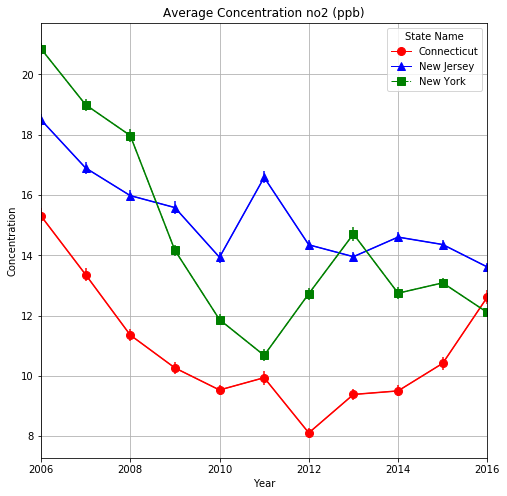

In [26]:
ax = no2_mean_pivot.plot(figsize=(8,8), color=["red","blue","green","black"], yerr = no2_sem_pivot, legend = False)
ax.set_prop_cycle('color', ["red","blue" , "green" , "black" ])
no2_mean_pivot.plot(figsize=(8,8), style=['o-', '^-', 's-.', 'd--'],markersize=8,linewidth=1 , ax=ax)
plt.title("Average Concentration no2 (ppb)")
plt.xlabel("Year")
plt.ylabel("Concentration")
plt.grid(b=None)
plt.savefig("Average Concentration no2.png")
plt.show()

In [27]:
no2_data.to_csv("../Output/Summary_no2_data.csv")

In [28]:
so2_df = pd.read_csv("../Output/so2_compiled.csv")

In [29]:
Tristate_so_data = so2_df.loc[(so2_df["State Name"]=="Connecticut")|(so2_df["State Name"]=="New York")|(so2_df["State Name"]=="New Jersey")]

In [30]:
Tristate_so2_data = Tristate_so_data.loc[Tristate_so_data["Date Local"]<"2017"]
Tristate_so2_data.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
35481,9,1,12,42401,1,41.195076,-73.163447,NAD83,Sulfur dioxide,1 HOUR,...,26.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,115 BOSTON TERRACE,Connecticut,Fairfield,Bridgeport,"Bridgeport-Stamford-Norwalk, CT",2013-06-11
35482,9,1,12,42401,1,41.195076,-73.163447,NAD83,Sulfur dioxide,1 HOUR,...,37.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,115 BOSTON TERRACE,Connecticut,Fairfield,Bridgeport,"Bridgeport-Stamford-Norwalk, CT",2013-06-11
35483,9,1,12,42401,1,41.195076,-73.163447,NAD83,Sulfur dioxide,1 HOUR,...,19.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,115 BOSTON TERRACE,Connecticut,Fairfield,Bridgeport,"Bridgeport-Stamford-Norwalk, CT",2013-06-11
35484,9,1,12,42401,1,41.195076,-73.163447,NAD83,Sulfur dioxide,1 HOUR,...,20.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,115 BOSTON TERRACE,Connecticut,Fairfield,Bridgeport,"Bridgeport-Stamford-Norwalk, CT",2013-06-11
35485,9,1,12,42401,1,41.195076,-73.163447,NAD83,Sulfur dioxide,1 HOUR,...,20.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,115 BOSTON TERRACE,Connecticut,Fairfield,Bridgeport,"Bridgeport-Stamford-Norwalk, CT",2013-06-11


In [33]:
Tristate_so2_data["State Name"].value_counts()

New York       179164
New Jersey      82593
Connecticut     45239
Name: State Name, dtype: int64

In [34]:
Tristate_so2_data.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
35481,9,1,12,42401,1,41.195076,-73.163447,NAD83,Sulfur dioxide,1 HOUR,...,26.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,115 BOSTON TERRACE,Connecticut,Fairfield,Bridgeport,"Bridgeport-Stamford-Norwalk, CT",2013-06-11
35482,9,1,12,42401,1,41.195076,-73.163447,NAD83,Sulfur dioxide,1 HOUR,...,37.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,115 BOSTON TERRACE,Connecticut,Fairfield,Bridgeport,"Bridgeport-Stamford-Norwalk, CT",2013-06-11
35483,9,1,12,42401,1,41.195076,-73.163447,NAD83,Sulfur dioxide,1 HOUR,...,19.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,115 BOSTON TERRACE,Connecticut,Fairfield,Bridgeport,"Bridgeport-Stamford-Norwalk, CT",2013-06-11
35484,9,1,12,42401,1,41.195076,-73.163447,NAD83,Sulfur dioxide,1 HOUR,...,20.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,115 BOSTON TERRACE,Connecticut,Fairfield,Bridgeport,"Bridgeport-Stamford-Norwalk, CT",2013-06-11
35485,9,1,12,42401,1,41.195076,-73.163447,NAD83,Sulfur dioxide,1 HOUR,...,20.0,60.0,INSTRUMENTAL - PULSED FLUORESCENT,NaN,115 BOSTON TERRACE,Connecticut,Fairfield,Bridgeport,"Bridgeport-Stamford-Norwalk, CT",2013-06-11


In [35]:
Tristate_so2_data["Date Local"] = pd.to_datetime(Tristate_so2_data["Date Local"])
Tristate_so2_data["Year"] = Tristate_so2_data["Date Local"].values.astype("datetime64[Y]")
Tristate_so2_data["Year"] = pd.DatetimeIndex(Tristate_so2_data['Date Local']).year
Tristate_so2_data["Year"]

C:\Users\parag\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\parag\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\parag\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

35481      2006
35482      2006
35483      2006
35484      2006
35485      2006
           ... 
3489810    2016
3489811    2016
3489812    2016
3489813    2016
3489814    2016
Name: Year, Length: 306996, dtype: int64

In [36]:
so2_data = Tristate_so2_data[["Year","Arithmetic Mean", "AQI", "State Name"]]
so2_data.reset_index(inplace=True, drop=True)
so2_data.head()

,Year,Arithmetic Mean,AQI,State Name
0,2006,9.375000,26.0,Connecticut
1,2006,11.708333,37.0,Connecticut
2,2006,4.583333,19.0,Connecticut
3,2006,6.208333,20.0,Connecticut
4,2006,10.166667,20.0,Connecticut


In [37]:
so2 = so2_data.groupby(["State Name", "Year"])["Arithmetic Mean"].mean()
so2_mean_df= pd.DataFrame(so2)
so2_mean_df.head()

Arithmetic Mean
State Name  Year                 
Connecticut 2006         3.101736
            2007         2.585524
            2008         1.985353
            2009         1.626982
            2010         1.118747

In [38]:
so2_1 = so2_data.groupby(["State Name", "Year"]).sem()["Arithmetic Mean"]
so2_sem_df= pd.DataFrame(so2_1)
so2_sem_df= so2_sem_df.reset_index()
so2_sem_df.head()

,State Name,Year,Arithmetic Mean
0,Connecticut,2006,0.047894
1,Connecticut,2007,0.034794
2,Connecticut,2008,0.032059
3,Connecticut,2009,0.035274
4,Connecticut,2010,0.022726


In [39]:
so2_mean_pivot = so2_data.pivot_table(index="Year",values="Arithmetic Mean", columns="State Name")
so2_mean_pivot

State Name,Connecticut,New Jersey,New York
Year,,,
2006,3.101736,3.666970,3.385060
2007,2.585524,2.915893,3.280798
2008,1.985353,2.203551,2.860487
2009,1.626982,1.531247,2.147699
2010,1.118747,1.214674,1.660259
2011,1.273658,1.723187,1.520880
2012,0.862446,0.960307,1.260925
2013,0.736465,0.612222,1.213943
2014,0.706542,0.597665,1.060308


In [40]:
so2_sem_pivot = so2_sem_df.pivot_table(index="Year",values="Arithmetic Mean", columns="State Name")
so2_sem_pivot

State Name,Connecticut,New Jersey,New York
Year,,,
2006,0.047894,0.031857,0.029263
2007,0.034794,0.026443,0.027726
2008,0.032059,0.022509,0.024422
2009,0.035274,0.019947,0.019863
2010,0.022726,0.017171,0.014684
2011,0.032373,0.028748,0.014248
2012,0.017518,0.016178,0.010117
2013,0.015024,0.012487,0.010895
2014,0.015549,0.014575,0.010166


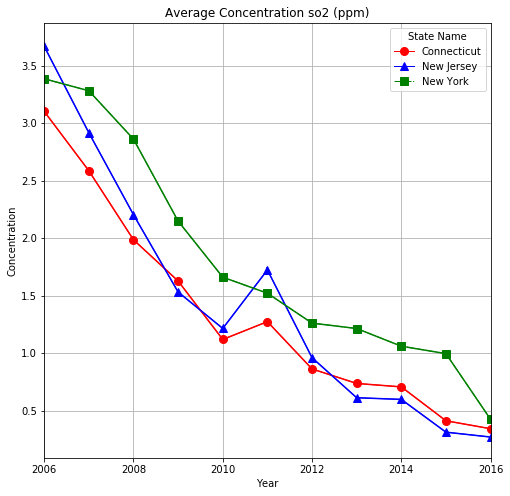

<Figure size 432x288 with 0 Axes>

In [91]:
ax = so2_mean_pivot.plot(figsize=(8,8), color=["red","blue","green","black"], yerr = so2_sem_pivot, legend = False)
ax.set_prop_cycle('color', ["red","blue" , "green" , "black" ])
so2_mean_pivot.plot(figsize=(8,8), style=['o-', '^-', 's-.', 'd--'],markersize=8,linewidth=1 , ax=ax)
plt.title("Average Concentration so2 (ppm)")
plt.xlabel("Year")
plt.ylabel("Concentration")
plt.grid(b=None)
plt.show()
plt.savefig("Average Concentration so2.png")

In [43]:
so2_data.to_csv("../Output/Summary_so2_data.csv")

In [45]:
co_df = pd.read_csv("../Output/co_compiled.csv")

In [46]:
Tristate_co1_data = co_df.loc[(co_df["State Name"]=="Connecticut")|(co_df["State Name"]=="New York")|(co_df["State Name"]=="New Jersey")&(co_df["Date Local"]>"1/1/2010")]

In [48]:
Tristate_co_data = Tristate_co1_data.loc[Tristate_co1_data["Date Local"]<"2017"]
Tristate_co_data.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
77816,9,1,20,42101,1,41.055833,-73.539444,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,NaN,LIBRARY 96 BROAD ST STAMFORD CT,Connecticut,Fairfield,Stamford,"Bridgeport-Stamford-Norwalk, CT",2016-04-12
77817,9,1,20,42101,1,41.055833,-73.539444,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,NaN,LIBRARY 96 BROAD ST STAMFORD CT,Connecticut,Fairfield,Stamford,"Bridgeport-Stamford-Norwalk, CT",2016-04-12
77818,9,1,20,42101,1,41.055833,-73.539444,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,NaN,LIBRARY 96 BROAD ST STAMFORD CT,Connecticut,Fairfield,Stamford,"Bridgeport-Stamford-Norwalk, CT",2016-04-12
77819,9,1,20,42101,1,41.055833,-73.539444,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,NaN,LIBRARY 96 BROAD ST STAMFORD CT,Connecticut,Fairfield,Stamford,"Bridgeport-Stamford-Norwalk, CT",2016-04-12
77820,9,1,20,42101,1,41.055833,-73.539444,WGS84,Carbon monoxide,1 HOUR,...,NaN,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,NaN,LIBRARY 96 BROAD ST STAMFORD CT,Connecticut,Fairfield,Stamford,"Bridgeport-Stamford-Norwalk, CT",2016-04-12


In [49]:
Tristate_co_data["State Name"].value_counts()

New York       74125
New Jersey     60812
Connecticut    43065
Name: State Name, dtype: int64

In [61]:
Tristate_co_data.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,Year
77816,9,1,20,42101,1,41.055833,-73.539444,WGS84,Carbon monoxide,1 HOUR,...,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,NaN,LIBRARY 96 BROAD ST STAMFORD CT,Connecticut,Fairfield,Stamford,"Bridgeport-Stamford-Norwalk, CT",2016-04-12,2006
77817,9,1,20,42101,1,41.055833,-73.539444,WGS84,Carbon monoxide,1 HOUR,...,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,NaN,LIBRARY 96 BROAD ST STAMFORD CT,Connecticut,Fairfield,Stamford,"Bridgeport-Stamford-Norwalk, CT",2016-04-12,2006
77818,9,1,20,42101,1,41.055833,-73.539444,WGS84,Carbon monoxide,1 HOUR,...,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,NaN,LIBRARY 96 BROAD ST STAMFORD CT,Connecticut,Fairfield,Stamford,"Bridgeport-Stamford-Norwalk, CT",2016-04-12,2006
77819,9,1,20,42101,1,41.055833,-73.539444,WGS84,Carbon monoxide,1 HOUR,...,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,NaN,LIBRARY 96 BROAD ST STAMFORD CT,Connecticut,Fairfield,Stamford,"Bridgeport-Stamford-Norwalk, CT",2016-04-12,2006
77820,9,1,20,42101,1,41.055833,-73.539444,WGS84,Carbon monoxide,1 HOUR,...,54.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,NaN,LIBRARY 96 BROAD ST STAMFORD CT,Connecticut,Fairfield,Stamford,"Bridgeport-Stamford-Norwalk, CT",2016-04-12,2006


In [62]:
Tristate_co_data["Date Local"] = pd.to_datetime(Tristate_co_data["Date Local"])
Tristate_co_data["Year"] = Tristate_co_data["Date Local"].values.astype("datetime64[Y]")
Tristate_co_data["Year"] = pd.DatetimeIndex(Tristate_co_data['Date Local']).year
Tristate_co_data["Year"]

C:\Users\parag\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\parag\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\parag\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

77816      2006
77817      2006
77818      2006
77819      2006
77820      2006
           ... 
2495115    2016
2495116    2016
2495117    2016
2495118    2016
2495119    2016
Name: Year, Length: 178002, dtype: int64

In [63]:
co_data = Tristate_co_data[["Year","Arithmetic Mean", "AQI", "State Name"]]
co_data.reset_index(inplace=True, drop=True)
co_data.head()

,Year,Arithmetic Mean,AQI,State Name
0,2006,1.137500,NaN,Connecticut
1,2006,1.187500,NaN,Connecticut
2,2006,0.833333,NaN,Connecticut
3,2006,0.804348,NaN,Connecticut
4,2006,1.254167,NaN,Connecticut


In [64]:
co = co_data.groupby(["State Name", "Year"])["Arithmetic Mean"].mean()
co_mean_df= pd.DataFrame(co)
co_mean_df.head()

Arithmetic Mean
State Name  Year                 
Connecticut 2006         0.684184
            2007         0.515974
            2008         0.479040
            2009         0.444038
            2010         0.398700

In [65]:
co_1 = co_data.groupby(["State Name", "Year"]).sem()["Arithmetic Mean"]
co_sem_df= pd.DataFrame(co_1)
co_sem_df= co_sem_df.reset_index()
co_sem_df.head()

,State Name,Year,Arithmetic Mean
0,Connecticut,2006,0.007655
1,Connecticut,2007,0.005219
2,Connecticut,2008,0.004991
3,Connecticut,2009,0.004609
4,Connecticut,2010,0.004094


In [66]:
co_mean_pivot = co_data.pivot_table(index="Year",values="Arithmetic Mean", columns="State Name")
co_mean_pivot

State Name,Connecticut,New Jersey,New York
Year,,,
2006,0.684184,0.508562,0.444761
2007,0.515974,0.402159,0.420561
2008,0.479040,0.366444,0.364067
2009,0.444038,0.358105,0.345451
2010,0.398700,0.342050,0.369323
2011,0.345067,0.394317,0.328033
2012,0.320283,0.423894,0.289554
2013,0.296519,0.391821,0.271511
2014,0.267383,0.357940,0.267362


In [67]:
co_sem_pivot = co_sem_df.pivot_table(index="Year",values="Arithmetic Mean", columns="State Name")
co_sem_pivot

State Name,Connecticut,New Jersey,New York
Year,,,
2006,0.007655,0.002790,0.002767
2007,0.005219,0.002209,0.002267
2008,0.004991,0.001955,0.002056
2009,0.004609,0.002118,0.002425
2010,0.004094,0.002433,0.002200
2011,0.003665,0.003593,0.002521
2012,0.003024,0.004168,0.002059
2013,0.002843,0.003540,0.002368
2014,0.002207,0.003137,0.002275


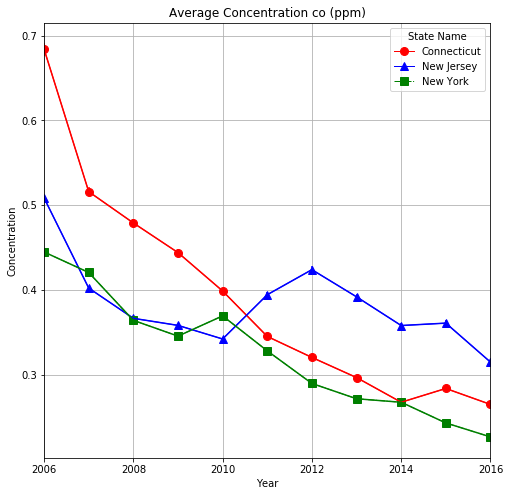

<Figure size 432x288 with 0 Axes>

In [68]:
ax = co_mean_pivot.plot(figsize=(8,8), color=["red","blue","green","black"], yerr = co_sem_pivot, legend = False)
ax.set_prop_cycle('color', ["red","blue" , "green" , "black" ])
co_mean_pivot.plot(figsize=(8,8), style=['o-', '^-', 's-.', 'd--'],markersize=8,linewidth=1 , ax=ax)
plt.title("Average Concentration co (ppm)")
plt.xlabel("Year")
plt.ylabel("Concentration")
plt.grid(b=None)
plt.show()
plt.savefig("Average Concentration co.png")

In [69]:
co_data.to_csv("../Output/Summary_co_data.csv")

In [70]:
ozone_df = pd.read_csv("../Output/ozone_compiled.csv")

In [71]:
Tristate_ozone1_data = ozone_df.loc[(ozone_df["State Name"]=="Connecticut")|(ozone_df["State Name"]=="New York")|(ozone_df["State Name"]=="New Jersey")&(ozone_df["Date Local"]>"1/1/2010")]

In [72]:
Tristate_ozone_data = Tristate_ozone1_data.loc[Tristate_ozone1_data["Date Local"]<"2017"]
Tristate_ozone_data.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
91480,9,1,17,44201,1,41.004657,-73.585128,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,43.0,NaN,-,Greenwich Point Park,Tods Driftway (see coordinates),Connecticut,Fairfield,Greenwich (Town of),"Bridgeport-Stamford-Norwalk, CT",2018-07-19
91481,9,1,17,44201,1,41.004657,-73.585128,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,41.0,NaN,-,Greenwich Point Park,Tods Driftway (see coordinates),Connecticut,Fairfield,Greenwich (Town of),"Bridgeport-Stamford-Norwalk, CT",2018-07-19
91482,9,1,17,44201,1,41.004657,-73.585128,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,48.0,NaN,-,Greenwich Point Park,Tods Driftway (see coordinates),Connecticut,Fairfield,Greenwich (Town of),"Bridgeport-Stamford-Norwalk, CT",2018-07-19
91483,9,1,17,44201,1,41.004657,-73.585128,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,42.0,NaN,-,Greenwich Point Park,Tods Driftway (see coordinates),Connecticut,Fairfield,Greenwich (Town of),"Bridgeport-Stamford-Norwalk, CT",2018-07-19
91484,9,1,17,44201,1,41.004657,-73.585128,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,40.0,NaN,-,Greenwich Point Park,Tods Driftway (see coordinates),Connecticut,Fairfield,Greenwich (Town of),"Bridgeport-Stamford-Norwalk, CT",2018-07-19


In [73]:
Tristate_ozone_data["State Name"].value_counts()

New York       130432
New Jersey      56706
Connecticut     29332
Name: State Name, dtype: int64

In [74]:
Tristate_ozone_data.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
91480,9,1,17,44201,1,41.004657,-73.585128,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,43.0,NaN,-,Greenwich Point Park,Tods Driftway (see coordinates),Connecticut,Fairfield,Greenwich (Town of),"Bridgeport-Stamford-Norwalk, CT",2018-07-19
91481,9,1,17,44201,1,41.004657,-73.585128,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,41.0,NaN,-,Greenwich Point Park,Tods Driftway (see coordinates),Connecticut,Fairfield,Greenwich (Town of),"Bridgeport-Stamford-Norwalk, CT",2018-07-19
91482,9,1,17,44201,1,41.004657,-73.585128,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,48.0,NaN,-,Greenwich Point Park,Tods Driftway (see coordinates),Connecticut,Fairfield,Greenwich (Town of),"Bridgeport-Stamford-Norwalk, CT",2018-07-19
91483,9,1,17,44201,1,41.004657,-73.585128,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,42.0,NaN,-,Greenwich Point Park,Tods Driftway (see coordinates),Connecticut,Fairfield,Greenwich (Town of),"Bridgeport-Stamford-Norwalk, CT",2018-07-19
91484,9,1,17,44201,1,41.004657,-73.585128,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,40.0,NaN,-,Greenwich Point Park,Tods Driftway (see coordinates),Connecticut,Fairfield,Greenwich (Town of),"Bridgeport-Stamford-Norwalk, CT",2018-07-19


In [75]:
Tristate_ozone_data["Date Local"] = pd.to_datetime(Tristate_ozone_data["Date Local"])
Tristate_ozone_data["Year"] = Tristate_ozone_data["Date Local"].values.astype("datetime64[Y]")
Tristate_ozone_data["Year"] = pd.DatetimeIndex(Tristate_ozone_data['Date Local']).year
Tristate_ozone_data["Year"]

C:\Users\parag\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\parag\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\parag\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

91480      2006
91481      2006
91482      2006
91483      2006
91484      2006
           ... 
4027096    2016
4027097    2016
4027098    2016
4027099    2016
4027100    2016
Name: Year, Length: 216470, dtype: int64

In [76]:
ozone_data = Tristate_ozone_data[["Year","Arithmetic Mean", "AQI", "State Name"]]
ozone_data.reset_index(inplace=True, drop=True)
ozone_data.head()

,Year,Arithmetic Mean,AQI,State Name
0,2006,0.045000,43.0,Connecticut
1,2006,0.035118,41.0,Connecticut
2,2006,0.037176,48.0,Connecticut
3,2006,0.040824,42.0,Connecticut
4,2006,0.032118,40.0,Connecticut


In [78]:
ozone = ozone_data.groupby(["State Name", "Year"])["Arithmetic Mean"].mean()
ozone_mean_df= pd.DataFrame(co)
ozone_mean_df.head()

Arithmetic Mean
State Name  Year                 
Connecticut 2006         0.684184
            2007         0.515974
            2008         0.479040
            2009         0.444038
            2010         0.398700

In [79]:
ozone_1 = ozone_data.groupby(["State Name", "Year"]).sem()["Arithmetic Mean"]
ozone_sem_df= pd.DataFrame(ozone_1)
ozone_sem_df= ozone_sem_df.reset_index()
ozone_sem_df.head()

,State Name,Year,Arithmetic Mean
0,Connecticut,2006,0.000257
1,Connecticut,2007,0.000252
2,Connecticut,2008,0.000238
3,Connecticut,2009,0.000211
4,Connecticut,2010,0.000221


In [80]:
ozone_mean_pivot = ozone_data.pivot_table(index="Year",values="Arithmetic Mean", columns="State Name")
ozone_mean_pivot

State Name,Connecticut,New Jersey,New York
Year,,,
2006,0.034918,0.029645,0.028977
2007,0.035702,0.030857,0.030071
2008,0.034424,0.029928,0.029280
2009,0.031080,0.027578,0.028484
2010,0.035253,0.032082,0.031241
2011,0.033597,0.029226,0.029463
2012,0.035286,0.029748,0.029514
2013,0.035532,0.029419,0.029540
2014,0.034761,0.028903,0.029424


In [81]:
ozone_sem_pivot = ozone_sem_df.pivot_table(index="Year",values="Arithmetic Mean", columns="State Name")
ozone_sem_pivot

State Name,Connecticut,New Jersey,New York
Year,,,
2006,0.000257,0.000207,0.000117
2007,0.000252,0.000213,0.000117
2008,0.000238,0.000198,0.000112
2009,0.000211,0.000167,0.000097
2010,0.000221,0.000186,0.000104
2011,0.000235,0.000180,0.000106
2012,0.000237,0.000185,0.000109
2013,0.000211,0.000157,0.000102
2014,0.000206,0.000153,0.000099


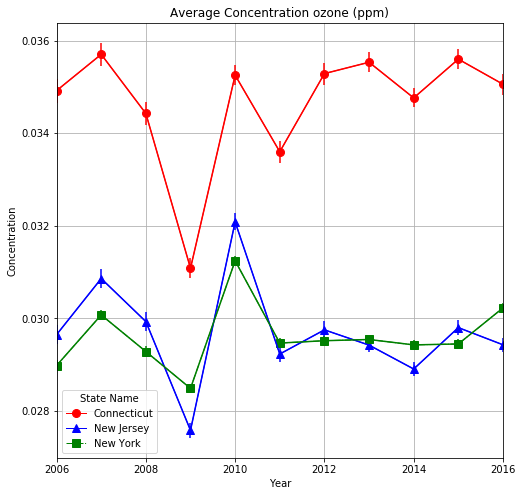

<Figure size 432x288 with 0 Axes>

In [82]:
ax = ozone_mean_pivot.plot(figsize=(8,8), color=["red","blue","green","black"], yerr = ozone_sem_pivot, legend = False)
ax.set_prop_cycle('color', ["red","blue" , "green" , "black" ])
ozone_mean_pivot.plot(figsize=(8,8), style=['o-', '^-', 's-.', 'd--'],markersize=8,linewidth=1 , ax=ax)
plt.title("Average Concentration ozone (ppm)")
plt.xlabel("Year")
plt.ylabel("Concentration")
plt.grid(b=None)
plt.show()
plt.savefig("Average Concentration ozone.png")

In [83]:
ozone_data.to_csv("../Output/Summary_ozone_data.csv")

In [ ]:
#Emissions DataFrame
emission_df = pd.read_csv("../Output/emissions_compiled.csv")

In [ ]:
nata_summary = pd.read_csv("../Output/NATA_assessment_results_by_hazards/nata2014v2_national_allhi.csv")
nata_cancer = pd.read_csv("../Output/NATA_assessment_results_by_hazards/nata2014v2_national_cancerrisk_by_tract_poll.csv")
nata_immune = pd.read_csv("../Output/NATA_assessment_results_by_hazards/nata2014v2_national_immuhi_by_tract_poll.csv")
nata_kidney = pd.read_csv("../Output/NATA_assessment_results_by_hazards/nata2014v2_national_kidnhi_by_tract_poll.csv")
nata_liver = pd.read_csv("../Output/NATA_assessment_results_by_hazards/nata2014v2_national_liverhi_by_tract_poll.csv")
nata_neuro = pd.read_csv("../Output/NATA_assessment_results_by_hazards/nata2014v2_national_neurhi_by_tract_poll.csv")
nata_respiratory = pd.read_csv("../Output/NATA_assessment_results_by_hazards/nata2014v2_national_resphi_by_tract_poll.csv")


# Analysis & Workings